#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from shutil import unpack_archive
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization


#Import Data

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-A9DplqY6rEDx4c7ZNXYmJHM4kS2TTvG' -O fintech.zip

unpack_archive('fintech.zip')

os.remove('fintech.zip')

--2022-07-14 08:00:52--  https://docs.google.com/uc?export=download&id=1-A9DplqY6rEDx4c7ZNXYmJHM4kS2TTvG
Resolving docs.google.com (docs.google.com)... 108.177.121.100, 108.177.121.113, 108.177.121.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.121.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jsc1a7psl055bd86egps4o0undq0rgek/1657785600000/14919976320250109613/*/1-A9DplqY6rEDx4c7ZNXYmJHM4kS2TTvG?e=download&uuid=abbb54d2-920b-4899-a861-968c5e2f120d [following]
--2022-07-14 08:00:53--  https://doc-0s-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jsc1a7psl055bd86egps4o0undq0rgek/1657785600000/14919976320250109613/*/1-A9DplqY6rEDx4c7ZNXYmJHM4kS2TTvG?e=download&uuid=abbb54d2-920b-4899-a861-968c5e2f120d
Resolving doc-0s-54-docs.googleusercontent.com (doc-0s-54-docs.googleusercontent.com)... 74.125.202.132, 2607:f

In [ ]:
#Import data train menjadi dataframe
df_train = pd.read_csv("train.csv", sep=';')
df_test = pd.read_csv("test.csv", sep=';')
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#Informasi dasar dari data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#EDA

##Data bilangan bulat

### Age

In [ ]:
#Statistik dasar dari data umur
df_train["age"].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


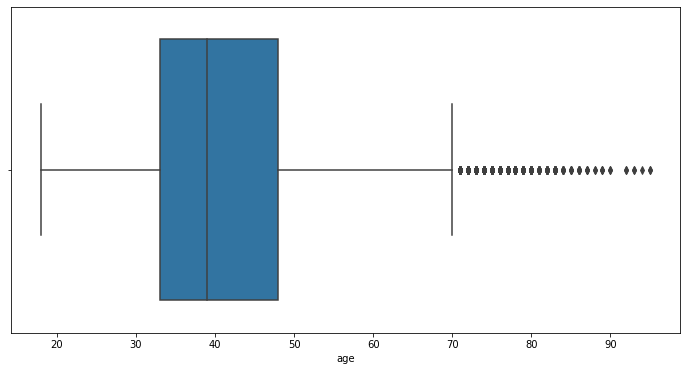

In [ ]:
#boxplot dari data umur
plt.figure(figsize=(12,6))
sns.boxplot(x = 'age', data = df_train, orient="v")
plt.show()

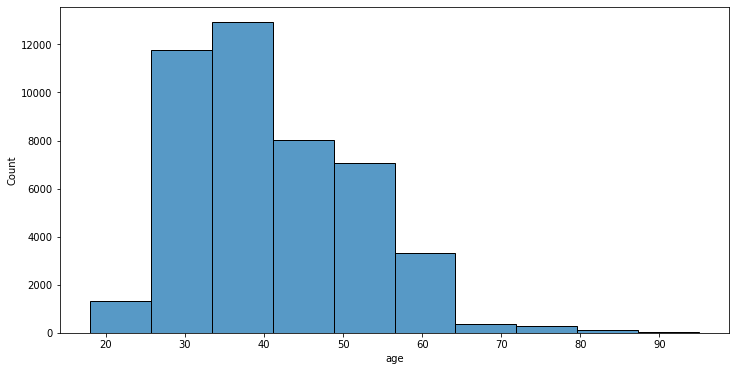

In [ ]:
#Histogram dari kategori umur
plt.figure(figsize=(12,6))
sns.histplot(data=df_train, x="age", bins=10)
plt.show()

In [ ]:
#Berdasarkan dua plot diatas, ubah kelompok umur menjadi data kategori sesuai boxplot
def age(dataframe):
    '''subprogram untuk memetakan umur ke kategori berdasarkan kuartil dan data pencilan '''
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 39), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 39) & (dataframe['age'] <= 48), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 48) & (dataframe['age'] <= 70), 'age'] = 4
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 5

###Balance

In [ ]:
#Statistik dasar dari data umur
df_train["balance"].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


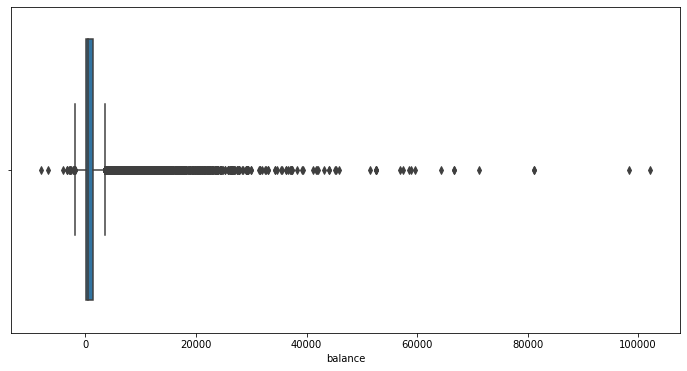

In [ ]:
#boxplot dari data balance
plt.figure(figsize=(12,6))
sns.boxplot(x = 'balance', data = df_train, orient="v")
plt.show()

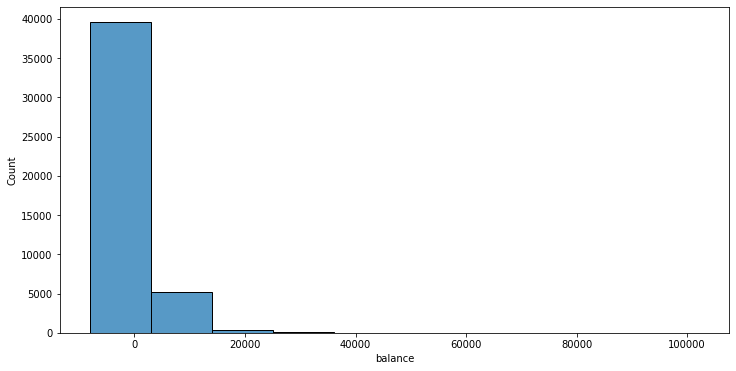

In [ ]:
#Histogram dari kategori balance
plt.figure(figsize=(12,6))
sns.histplot(data=df_train, x="balance", bins=10)
plt.show()

###Day

In [ ]:
df_train['day'].describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [ ]:
df_train["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

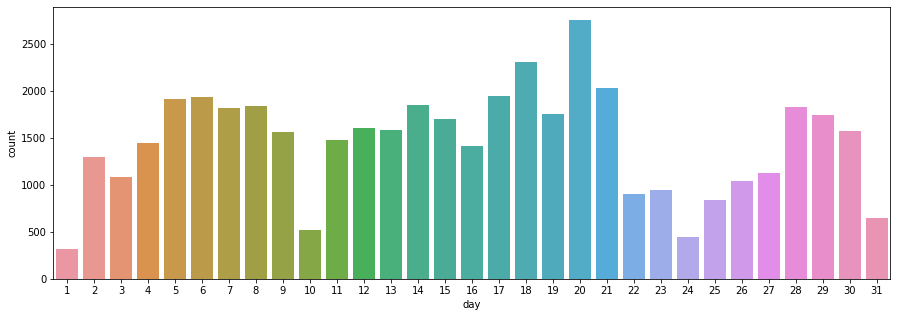

In [ ]:
#countplot untuk nilai day
plt.subplots(figsize = (15,5))
sns.countplot(x="day", data=df_train)
plt.show()

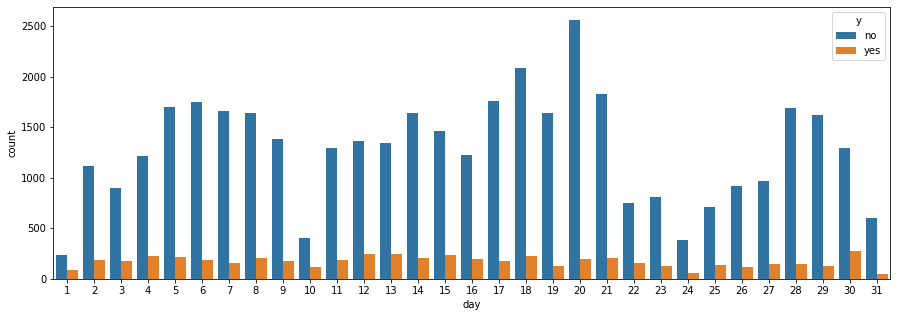

In [ ]:
#countplot untuk nilai day with y
plt.subplots(figsize = (15,5))
sns.countplot(x="day", hue='y', data=df_train)
plt.show()

###Duration

In [ ]:
df_train['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


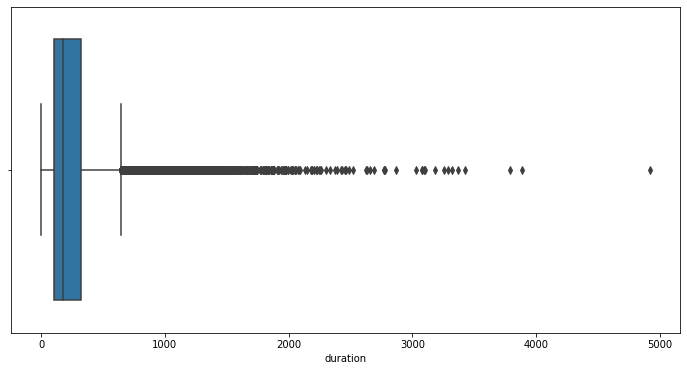

In [ ]:
#boxplot dari data duration
plt.figure(figsize=(12,6))
sns.boxplot(x = 'duration', data = df_train, orient="v")
plt.show()

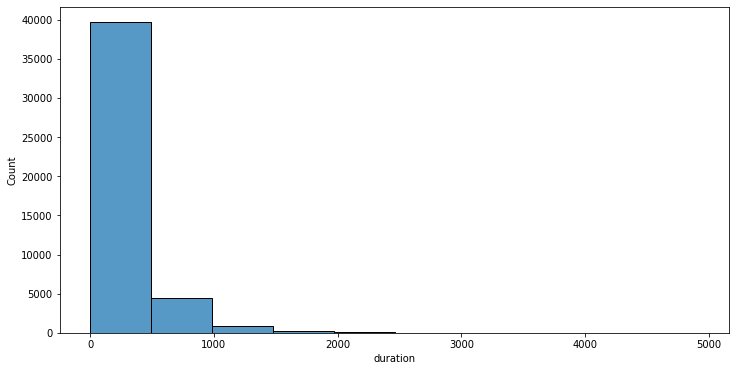

In [ ]:
#Histogram dari kategori duration
plt.figure(figsize=(12,6))
sns.histplot(data=df_train, x="duration", bins=10)
plt.show()

###Campaign

In [ ]:
df_train["campaign"].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


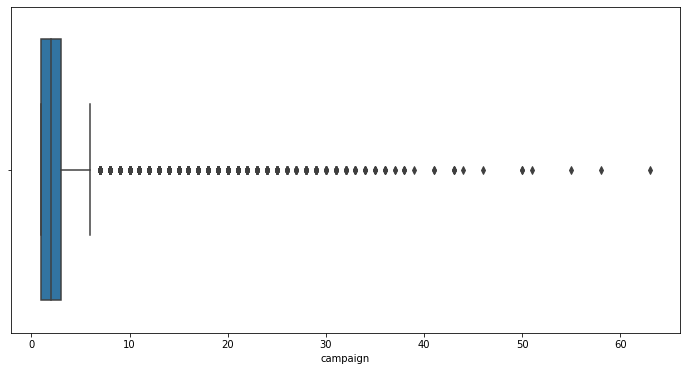

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'campaign', data = df_train, orient="v")
plt.show()

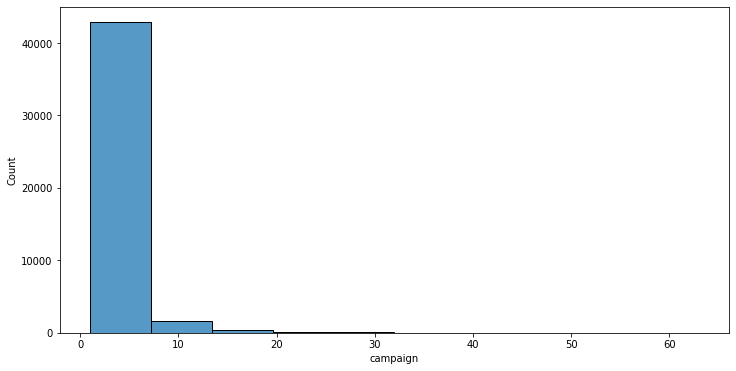

In [ ]:
#Histogram dari kategori duration
plt.figure(figsize=(12,6))
sns.histplot(data=df_train, x="campaign", bins=10)
plt.show()

###Pdays

In [ ]:
df_train["pdays"].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


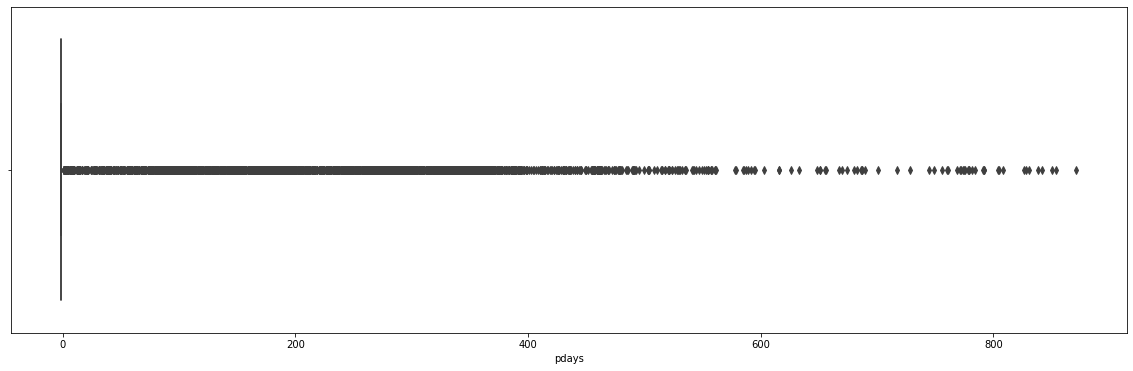

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x = 'pdays', data = df_train, orient="v")
plt.show()

In [ ]:
df_train_pdaysneg = df_train[df_train['pdays']==-1]
df_train_pdaysneg

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [ ]:
df_train_pdayspos = df_train[df_train['pdays']!=-1]
df_train_pdayspos

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [ ]:
df_train_pdayspos["pdays"].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


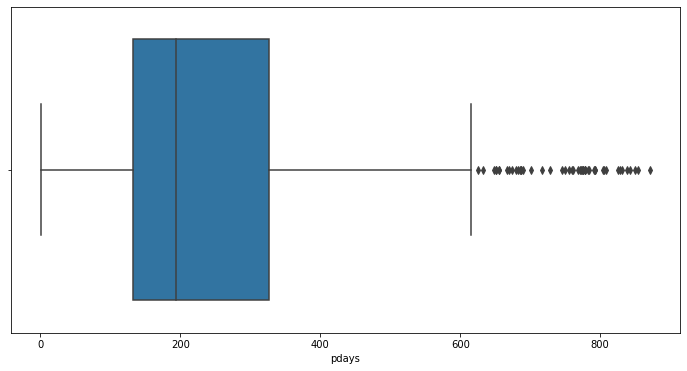

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'pdays', data = df_train_pdayspos, orient="v")
plt.show()

In [ ]:
def pdays(dataframe):
    dataframe.loc[dataframe['pdays'] == -1, 'pdays'] = 1
    dataframe.loc[(dataframe['pdays'] >= 0) & (dataframe['pdays'] <= 133), 'pdays'] = 2
    dataframe.loc[(dataframe['pdays'] > 133) & (dataframe['pdays'] <= 194), 'pdays'] = 3
    dataframe.loc[(dataframe['pdays'] > 194) & (dataframe['pdays'] <= 327), 'pdays'] = 4
    dataframe.loc[dataframe['pdays'] > 327, 'pdays'] = 5

###Previous

In [ ]:
df_train["previous"].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


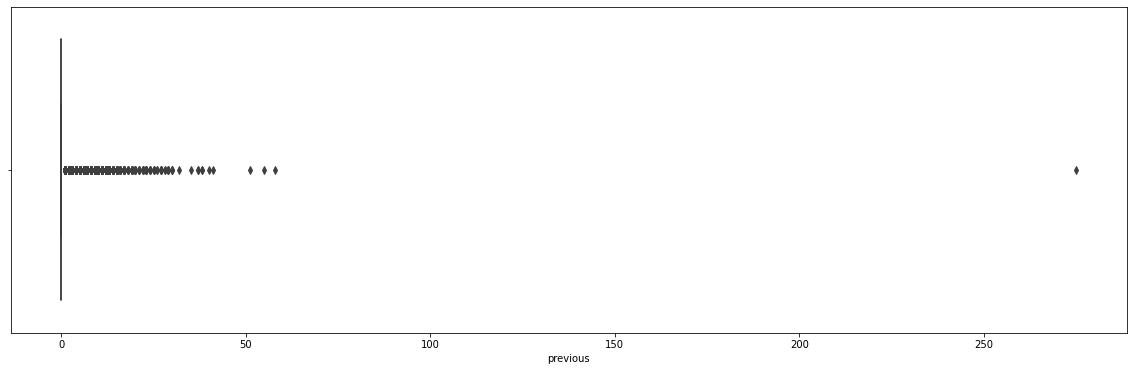

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x = 'previous', data = df_train, orient="v")
plt.show()

In [ ]:
df_train_previous0 = df_train[df_train['previous']==0]
df_train_previous0

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [ ]:
df_train_previouspos = df_train[df_train['previous']!=0]
df_train_previouspos

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [ ]:
df_train_previouspos["previous"].describe()

count    8257.000000
mean        3.177546
std         4.560820
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       275.000000
Name: previous, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


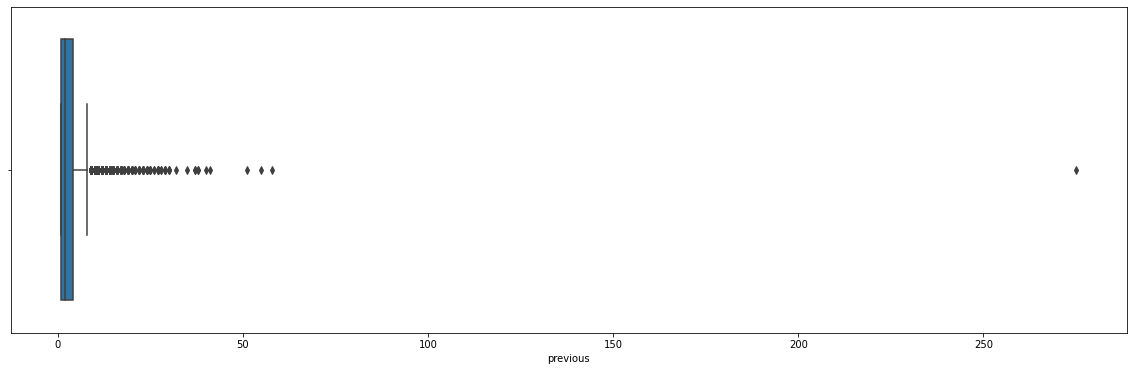

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x = 'previous', data = df_train_previouspos, orient="v")
plt.show()

In [ ]:
def previous(dataframe):
    dataframe.loc[dataframe['previous'] == 0, 'previous'] = 1
    dataframe.loc[dataframe['previous'] == 1, 'previous'] = 2
    dataframe.loc[dataframe['previous'] == 2, 'previous'] = 3
    dataframe.loc[(dataframe['previous'] > 2) & (dataframe['previous'] <= 4), 'previous'] = 4
    dataframe.loc[dataframe['previous'] > 4, 'previous'] = 5

##Data Kategori

###Job

In [ ]:
df_train["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

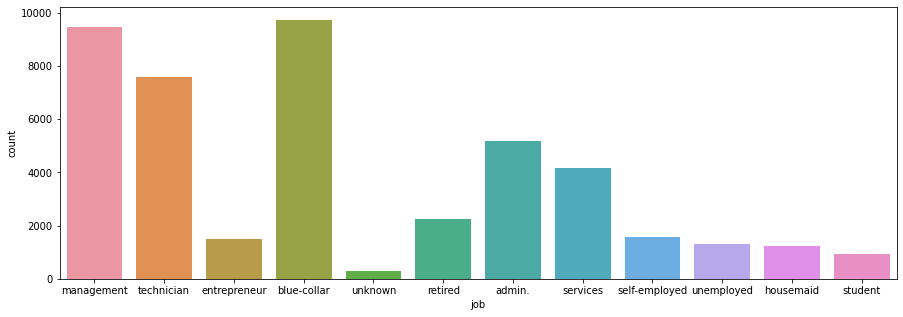

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x="job", data=df_train)
plt.show()

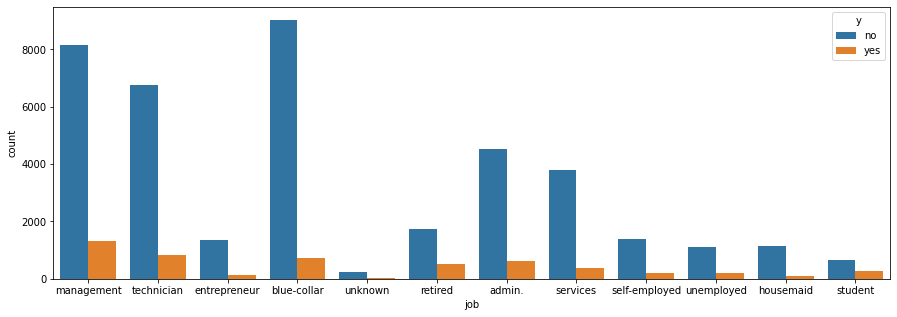

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x="job",hue="y", data=df_train)
plt.show()

In [ ]:
def ubahjobtoint(df):
  df['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'] , [1, 2, 3, 4, 5, 5, 7, 8, 9, 10, 11, 12], inplace=True)

###Marital

In [ ]:
df_train["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

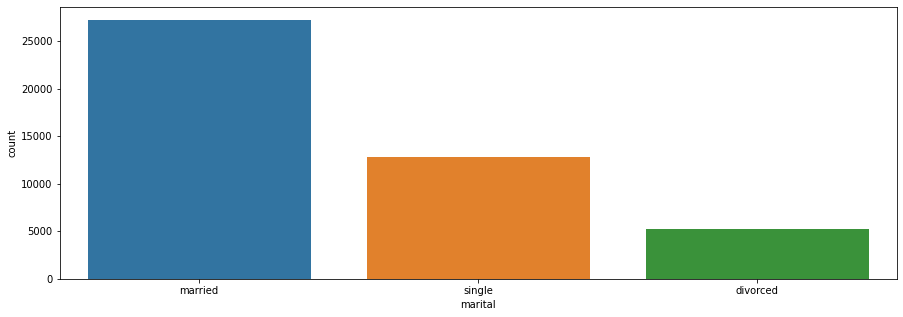

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x="marital", data=df_train)
plt.show()

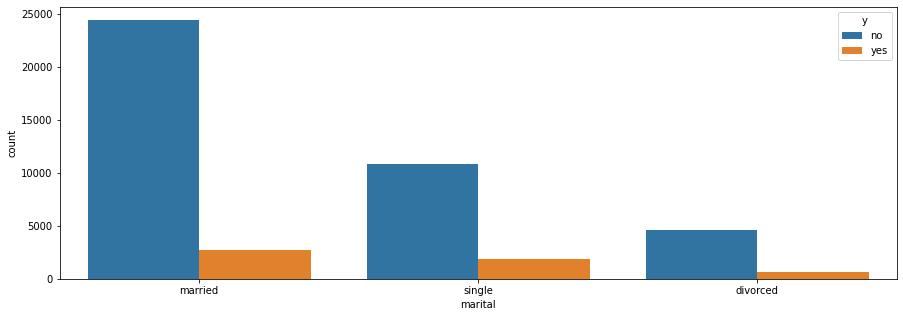

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x="marital",hue="y", data=df_train)
plt.show()

###Education

In [ ]:
df_train["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

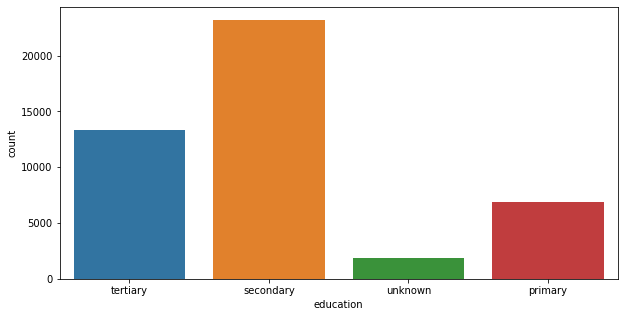

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="education", data=df_train)
plt.show()

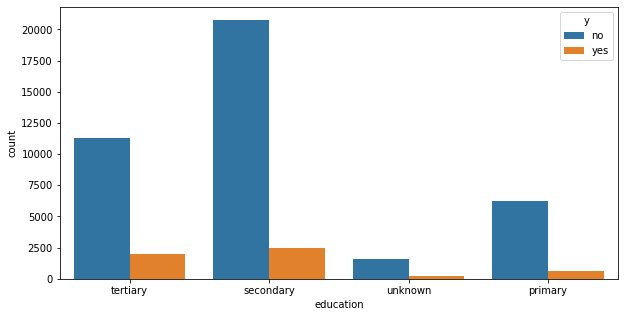

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="education",hue="y", data=df_train)
plt.show()

###Default

In [ ]:
df_train["default"].unique()

array(['no', 'yes'], dtype=object)

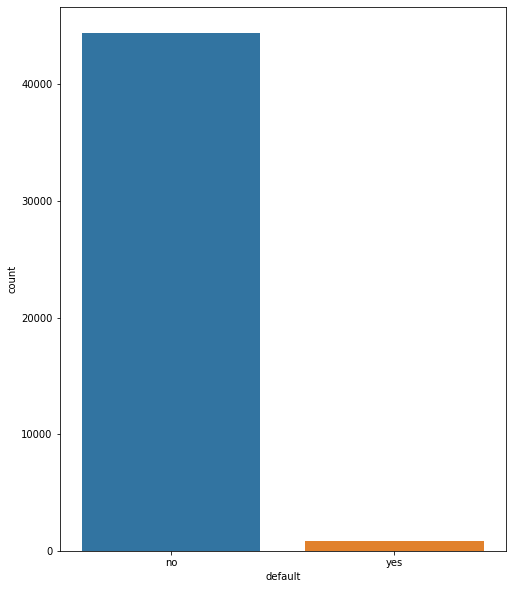

In [ ]:
plt.subplots(figsize = (8,10))
sns.countplot(x="default", data=df_train)
plt.show()

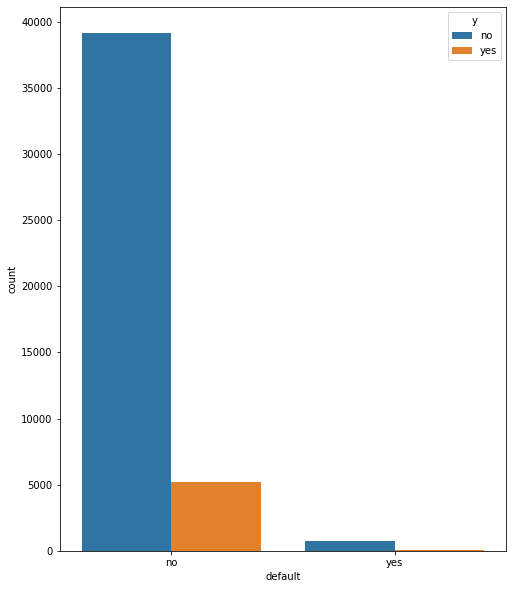

In [ ]:
plt.subplots(figsize = (8,10))
sns.countplot(x="default",hue="y", data=df_train)
plt.show()

###Housing

In [ ]:
df_train["housing"].unique()


array(['yes', 'no'], dtype=object)

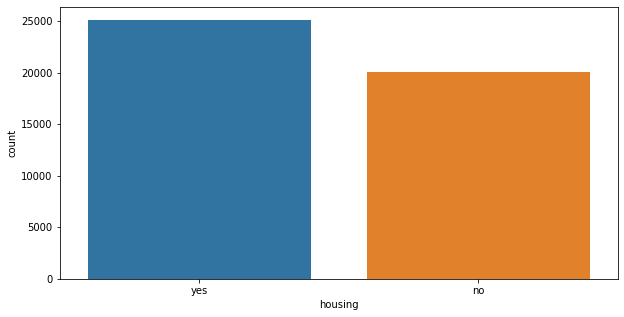

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="housing", data=df_train)
plt.show()

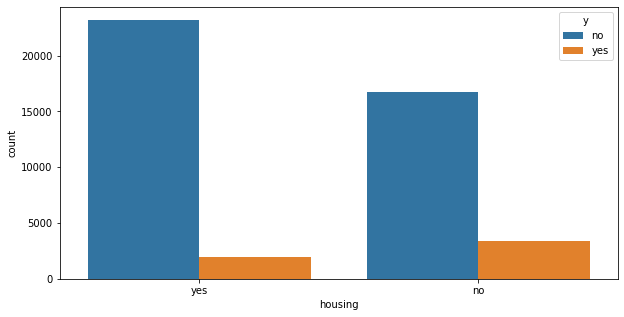

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="housing",hue="y", data=df_train)
plt.show()

###Loan

In [ ]:
df_train["loan"].unique()

array(['no', 'yes'], dtype=object)

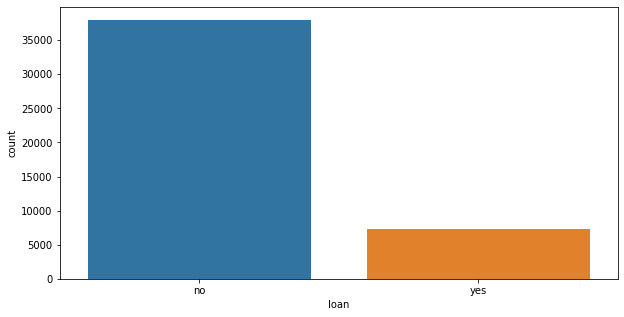

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="loan", data=df_train)
plt.show()

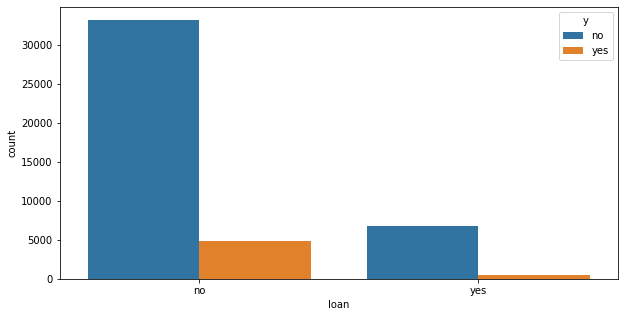

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="loan",hue="y", data=df_train)
plt.show()

###Contact

In [ ]:
df_train["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

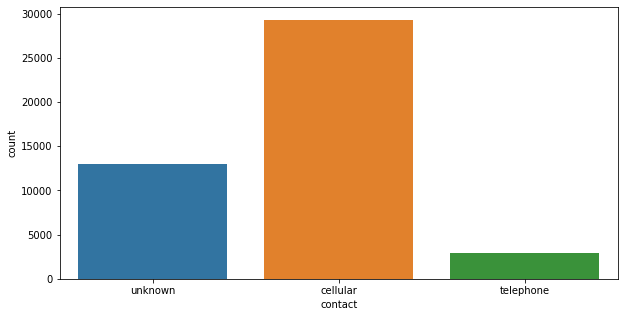

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="contact", data=df_train)
plt.show()

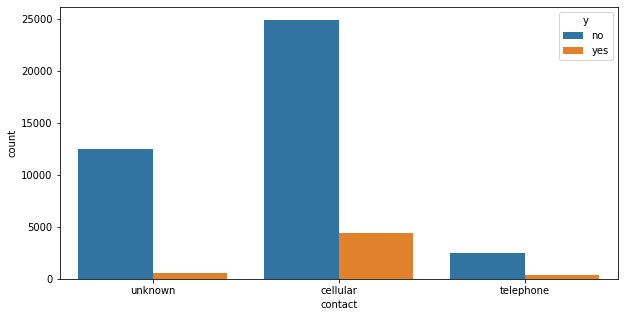

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="contact",hue="y", data=df_train)
plt.show()

###Month

In [ ]:
df_train["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

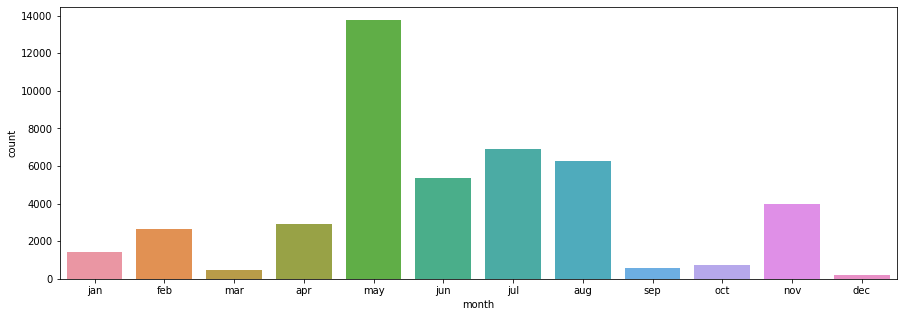

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x="month", data=df_train, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.show()

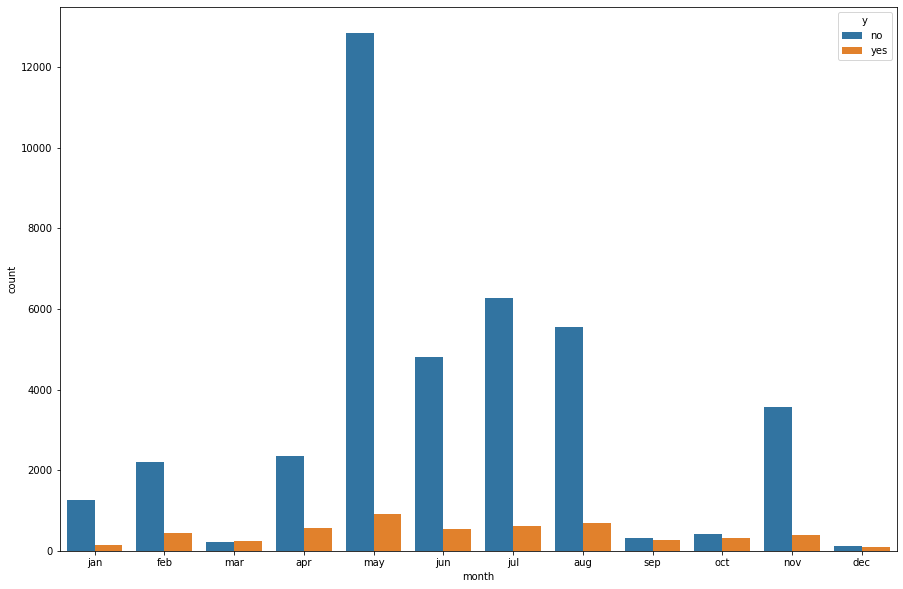

In [ ]:
plt.subplots(figsize = (15,10))
sns.countplot(x="month",hue="y", data=df_train, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.show()

In [ ]:
def ubahmonthtoint(df):
  df['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'] , [5, 6, 7, 8, 10, 11, 12, 1, 2, 3, 4, 9], inplace=True)

###Poutcome

In [ ]:
df_train["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

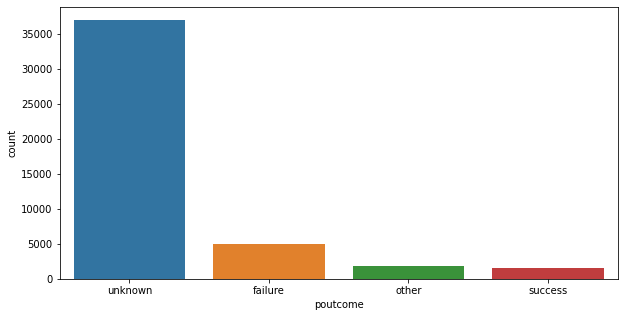

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="poutcome", data=df_train)
plt.show()

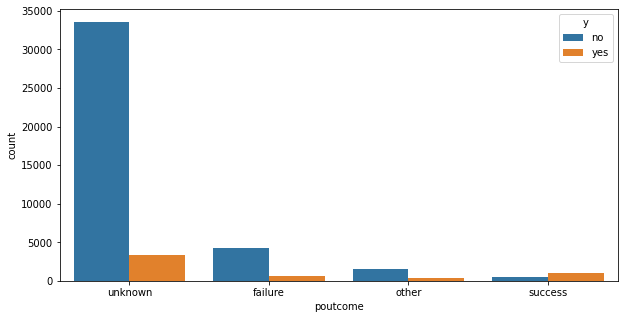

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="poutcome",hue="y", data=df_train)
plt.show()

###y

In [ ]:
df_train["y"].unique()

array(['no', 'yes'], dtype=object)

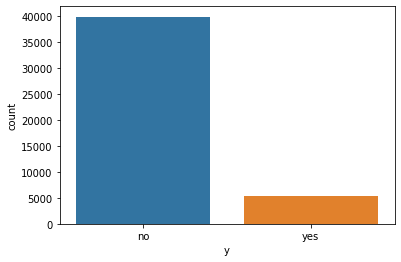

In [ ]:
sns.countplot(x="y", data=df_train)

##Ubah data

In [ ]:
def preprocesint(df):
  df['balance'] = df['balance'].agg(lambda x :(x-x.mean())/(x.std()))
  df['duration'] = df['duration'].agg(lambda x :(x-x.mean())/(x.std()))
  df['campaign'] = df['campaign'].agg(lambda x :(x-x.mean())/(x.std()))
  age(df)
  pdays(df)
  previous(df)
  ubahjobtoint(df)
  ubahmonthtoint(df)

In [ ]:
preprocesint(df_train)
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,4,1,married,tertiary,no,0.256416,yes,no,unknown,5,5,0.011016,-0.569344,2,4,unknown,no
1,3,2,single,secondary,no,-0.437890,yes,no,unknown,5,5,-0.416122,-0.569344,2,4,unknown,no
2,2,3,married,secondary,no,-0.446758,yes,yes,unknown,5,5,-0.707353,-0.569344,2,4,unknown,no
3,3,4,married,unknown,no,0.047205,yes,no,unknown,5,5,-0.645224,-0.569344,2,4,unknown,no
4,2,5,single,unknown,no,-0.447086,no,no,unknown,5,5,-0.233618,-0.569344,2,4,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,4,2,married,tertiary,no,-0.176458,no,no,cellular,17,11,2.791298,0.076229,2,4,unknown,yes
45207,5,5,divorced,primary,no,0.120445,no,no,cellular,17,11,0.768216,-0.246558,2,4,unknown,yes
45208,5,5,married,secondary,no,1.429577,no,no,cellular,17,11,3.373760,0.721803,3,4,success,yes
45209,4,4,married,secondary,no,-0.228021,no,no,telephone,17,11,0.970136,0.399016,2,4,unknown,no


##Oversample

In [ ]:
a = df_train[df_train["y"] == "yes"].shape
b = df_train[df_train["y"] == "no"].shape
while b[0]/a[0] > 1.2:
  df_random_yes = df_train[df_train["y"] == "yes"].sample(frac=0.75)
  df_random_no = df_train[df_train["y"] == "no"].sample(frac=0.2)
  df_train = pd.concat([df_train, df_random_yes, df_random_no])
  a = df_train[df_train["y"] == "yes"].shape
  b = df_train[df_train["y"] == "no"].shape

In [ ]:
df_train.reset_index(drop=True, inplace=True)

In [ ]:
a = df_train[df_train["y"] == "yes"].shape
a[0]

86810

In [ ]:
'''
df_train_yes = df_train[df_train["y"]=="yes"]
df_train = pd.concat([df_train, df_train_yes, df_train_yes, df_train_yes, df_train_yes, df_train_yes, df_train_yes])
df_train
'''

'\ndf_train_yes = df_train[df_train["y"]=="yes"]\ndf_train = pd.concat([df_train, df_train_yes, df_train_yes, df_train_yes, df_train_yes, df_train_yes, df_train_yes])\ndf_train\n'

#Train Data

In [ ]:
df = pd.get_dummies(df_train, columns=['job','loan','poutcome','contact','education','marital','default','housing','pdays','previous'], drop_first=True)
df

,age,balance,day,month,duration,campaign,y,job_2,job_3,job_4,...,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,pdays_3,pdays_4,pdays_5,previous_5
0,4,0.256416,5,5,0.011016,-0.569344,no,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,3,-0.437890,5,5,-0.416122,-0.569344,no,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,2,-0.446758,5,5,-0.707353,-0.569344,no,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,3,0.047205,5,5,-0.645224,-0.569344,no,0,0,1,...,0,1,1,0,0,1,0,0,0,0
4,2,-0.447086,5,5,-0.233618,-0.569344,no,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186142,3,-0.447414,26,5,0.554647,-0.569344,no,0,0,0,...,1,0,1,0,0,0,0,0,0,0
186143,1,-0.413586,10,2,-0.800547,2.012949,no,0,0,0,...,1,0,1,0,0,0,0,0,0,0
186144,2,8.328630,5,2,0.686671,0.076229,no,0,0,0,...,1,0,1,0,0,0,0,0,0,0
186145,3,-0.348885,14,8,0.356610,0.399016,no,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
label = df['y'].replace(['no', 'yes'],[0,1])
y = np_utils.to_categorical(label, 2)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
X = df.drop(['y','duration'], axis=1)
X

,age,balance,day,month,campaign,job_2,job_3,job_4,job_5,job_7,...,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,pdays_3,pdays_4,pdays_5,previous_5
0,4,0.256416,5,5,-0.569344,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,3,-0.437890,5,5,-0.569344,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,2,-0.446758,5,5,-0.569344,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,3,0.047205,5,5,-0.569344,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
4,2,-0.447086,5,5,-0.569344,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186142,3,-0.447414,26,5,-0.569344,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
186143,1,-0.413586,10,2,2.012949,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
186144,2,8.328630,5,2,0.076229,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
186145,3,-0.348885,14,8,0.399016,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
size=X.shape[1]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=85, stratify=y)

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(size,)),
        tf.keras.layers.Dense(size*3, activation='relu'),
        BatchNormalization(),
        tf.keras.layers.Dense(size*6, activation='relu'),
        BatchNormalization(),                           
        tf.keras.layers.Dense(size*12, activation='relu'),
        BatchNormalization(),
        tf.keras.layers.Dense(size*24, activation='relu'),
        BatchNormalization(),
        tf.keras.layers.Dense(2, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                3168      
                                                                 
 batch_normalization (BatchN  (None, 96)               384       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 192)               18624     
                                                                 
 batch_normalization_1 (Batc  (None, 192)              768       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 384)               74112     
                                                                 
 batch_normalization_2 (Batc  (None, 384)              1

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                   validation_data=(X_val, y_val),
                   epochs=100, batch_size=200, verbose=1)

print('History of the training',history.history)

Epoch 1/100
838/838 [==============================] - 23s 22ms/step - loss: 0.5482 - accuracy: 0.7307 - val_loss: 0.5202 - val_accuracy: 0.7489
Epoch 2/100
838/838 [==============================] - 18s 22ms/step - loss: 0.4950 - accuracy: 0.7626 - val_loss: 0.5001 - val_accuracy: 0.7583
Epoch 3/100
838/838 [==============================] - 18s 22ms/step - loss: 0.4408 - accuracy: 0.7960 - val_loss: 0.4543 - val_accuracy: 0.7898
Epoch 4/100
838/838 [==============================] - 18s 22ms/step - loss: 0.3774 - accuracy: 0.8316 - val_loss: 0.3501 - val_accuracy: 0.8441
Epoch 5/100
838/838 [==============================] - 18s 22ms/step - loss: 0.3183 - accuracy: 0.8631 - val_loss: 0.2948 - val_accuracy: 0.8748
Epoch 6/100
838/838 [==============================] - 20s 24ms/step - loss: 0.2696 - accuracy: 0.8867 - val_loss: 0.2677 - val_accuracy: 0.8875
Epoch 7/100
838/838 [==============================] - 19s 22ms/step - loss: 0.2318 - accuracy: 0.9052 - val_loss: 0.2411 - val_ac

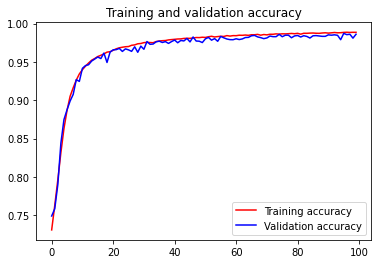

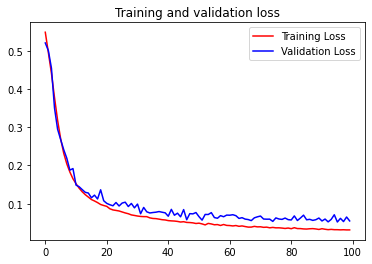

In [ ]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_predict=model.predict(X_val)
ypred=np.argmax(y_predict, axis=1)
ytes=np.argmax(y_val, axis=1)

In [ ]:
confusion_matrix(ytes, ypred)

array([[9715,  219],
       [  39, 8642]])

In [ ]:
print(classification_report(ytes, ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9934
           1       0.98      1.00      0.99      8681

    accuracy                           0.99     18615
   macro avg       0.99      0.99      0.99     18615
weighted avg       0.99      0.99      0.99     18615



#Test Data

In [ ]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
preprocesint(df_test)
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,10,married,primary,no,0.121058,no,no,cellular,19,10,-0.711782,-0.576766,2,4,unknown,no
1,2,8,married,secondary,no,1.118521,yes,yes,cellular,11,5,-0.169175,-0.576766,5,4,failure,no
2,2,1,single,tertiary,no,-0.024142,yes,no,cellular,16,4,-0.303865,-0.576766,5,4,failure,no
3,1,1,married,tertiary,no,0.017724,yes,yes,unknown,3,6,-0.249989,0.387925,2,4,unknown,no
4,4,4,married,secondary,no,-0.472701,yes,no,unknown,5,5,-0.146086,-0.576766,2,4,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,2,8,married,secondary,no,-0.583345,yes,no,cellular,30,7,0.250287,0.709488,2,4,unknown,no
4517,4,9,married,tertiary,yes,-1.573497,yes,yes,unknown,9,5,-0.427010,-0.576766,2,4,unknown,no
4518,4,2,married,secondary,no,-0.374682,no,no,cellular,19,8,-0.434706,2.638868,2,4,unknown,no
4519,1,4,married,secondary,no,-0.094914,no,no,cellular,6,2,-0.519368,0.387925,4,4,other,no


In [ ]:
dftestdum = pd.get_dummies(df_test, columns=['job','loan','poutcome','contact','education','marital','default','housing','pdays','previous'], drop_first=True)

In [ ]:
labels = dftestdum['y'].replace(['no', 'yes'],[0,1])
Y = np_utils.to_categorical(labels, 2)
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
Xtest = dftestdum.drop(['y','duration'], axis=1)
Xtest

,age,balance,day,month,campaign,job_2,job_3,job_4,job_5,job_7,...,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,pdays_3,pdays_4,pdays_5,previous_5
0,1,0.121058,19,10,-0.576766,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,1.118521,11,5,-0.576766,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,2,-0.024142,16,4,-0.576766,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
3,1,0.017724,3,6,0.387925,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
4,4,-0.472701,5,5,-0.576766,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,2,-0.583345,30,7,0.709488,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4517,4,-1.573497,9,5,-0.576766,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,0
4518,4,-0.374682,19,8,2.638868,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4519,1,-0.094914,6,2,0.387925,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
Y_predict=model.predict(Xtest)
Ypred=np.argmax(Y_predict, axis=1)
Ytes=np.argmax(Y, axis=1)

In [ ]:
confusion_matrix(Ytes, Ypred)

array([[3947,   53],
       [   4,  517]])

In [ ]:
print(classification_report(Ytes, Ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4000
           1       0.91      0.99      0.95       521

    accuracy                           0.99      4521
   macro avg       0.95      0.99      0.97      4521
weighted avg       0.99      0.99      0.99      4521

